# Import dataset 

In [1]:
import pandas as pd
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

currentPath = os.getcwd()
data_path = currentPath + "/data"


In [2]:
df_test = pd.read_csv(data_path + '/Test_Set/RFMiD_Testing_Labels.csv')
df_train = pd.read_csv(data_path + '/Training_Set/RFMiD_Training_Labels.csv')
df_evaluation = pd.read_csv(data_path + '/Evaluation_Set/RFMiD_Validation_Labels.csv')

In [3]:
df_test.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_evaluation.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# chercher les colonnes qui ont que des 0
pd.set_option('display.max_columns', None)
for column in df_test.columns[1:]:  # Commencez à partir de la deuxième colonne pour exclure 'ID'
    unique_values = df_test[column].unique()
    print(f'Colonne {column}: {unique_values}')

Colonne Disease_Risk: [1 0]
Colonne DR: [1 0]
Colonne ARMD: [0 1]
Colonne MH: [0 1]
Colonne DN: [0 1]
Colonne MYA: [0 1]
Colonne BRVO: [0 1]
Colonne TSLN: [1 0]
Colonne ERM: [0 1]
Colonne LS: [0 1]
Colonne MS: [0 1]
Colonne CSR: [0 1]
Colonne ODC: [0 1]
Colonne CRVO: [0 1]
Colonne TV: [0 1]
Colonne AH: [0 1]
Colonne ODP: [0 1]
Colonne ODE: [0 1]
Colonne ST: [0 1]
Colonne AION: [0 1]
Colonne PT: [0 1]
Colonne RT: [0 1]
Colonne RS: [0 1]
Colonne CRS: [0 1]
Colonne EDN: [0 1]
Colonne RPEC: [0 1]
Colonne MHL: [0 1]
Colonne RP: [0 1]
Colonne CWS: [0 1]
Colonne CB: [0 1]
Colonne ODPM: [0]
Colonne PRH: [0 1]
Colonne MNF: [0]
Colonne HR: [0 1]
Colonne CRAO: [0]
Colonne TD: [0 1]
Colonne CME: [0 1]
Colonne PTCR: [0]
Colonne CF: [0 1]
Colonne VH: [0 1]
Colonne MCA: [0]
Colonne VS: [0]
Colonne BRAO: [0]
Colonne PLQ: [0]
Colonne HPED: [0]
Colonne CL: [0 1]


In [7]:
##### drop les colonnes qui ont que des 0 ##########
# Liste des noms de colonnes à supprimer
columns_to_drop = ['HPED', 'PLQ', 'BRAO', 'VS', 'MCA', 'PTCR', 'MNF', 'CRAO', 'ODPM']

# Supprimez les colonnes
df_test.drop(columns=columns_to_drop, inplace=True)

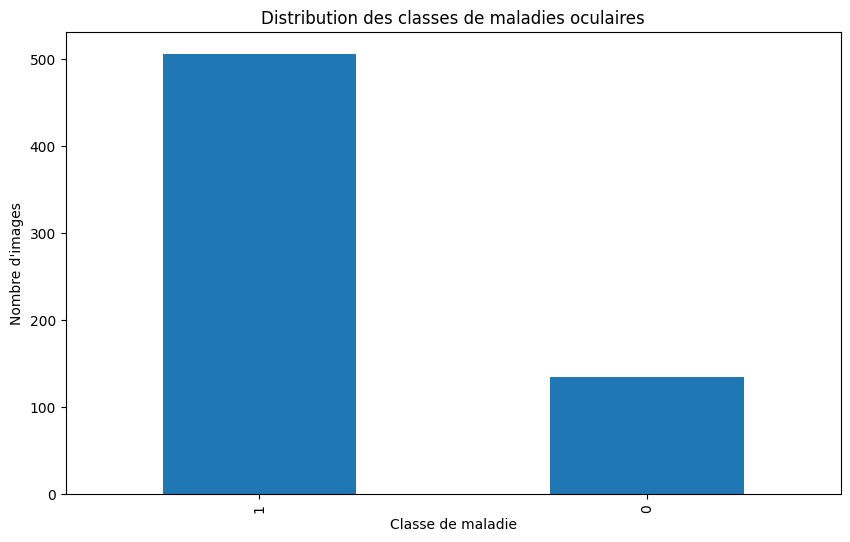

In [8]:
# Comptez le nombre d'images par classe
class_counts = df_test['Disease_Risk'].value_counts()

# Tracer le diagramme à barres
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Distribution des classes de maladies oculaires')
plt.xlabel('Classe de maladie')
plt.ylabel('Nombre d\'images')
plt.show()

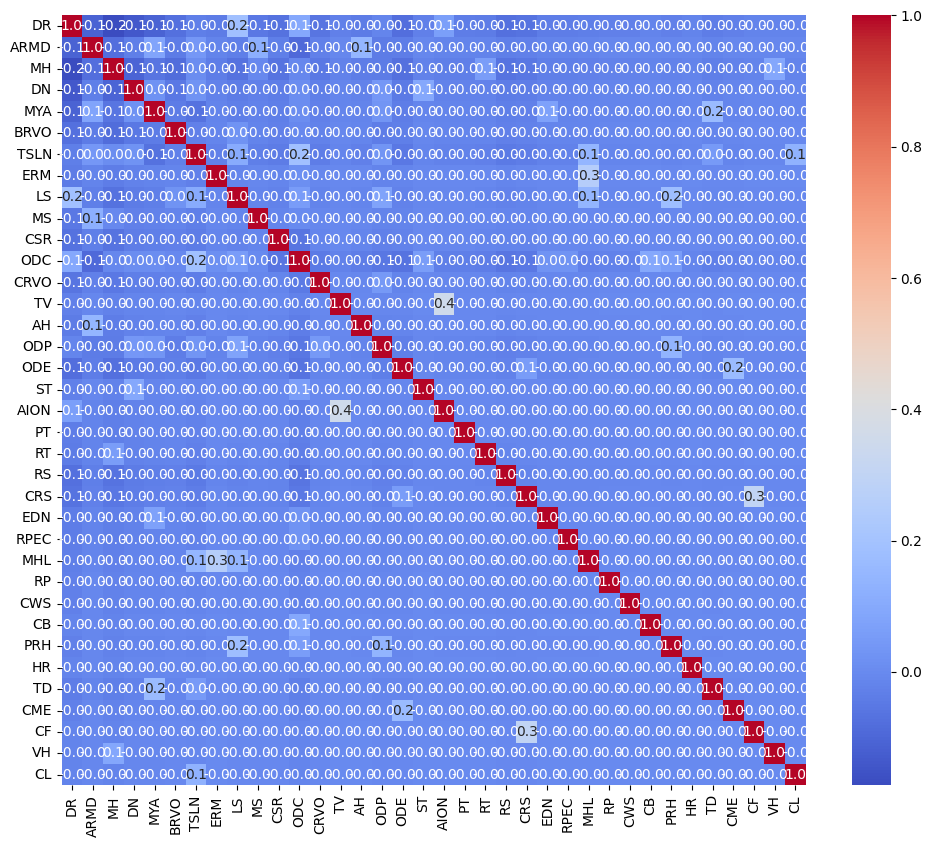

In [9]:
# Exclure les deux premières colonnes (ID et Disease_Risk) pour la matrice de corrélation
correlation_df = df_test.iloc[:, 2:].astype(float)

# Calculer la matrice de corrélation
correlation_matrix = correlation_df.corr()

# Créer une figure
plt.figure(figsize=(12, 10))

# Tracer la matrice de corrélation sous forme de carte de chaleur
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")

# Afficher le graphique
plt.show()

In [10]:
df_test_cleaned = df_test.copy()

In [11]:
df_test_cleaned['ID'] = df_test['ID'].astype(str) + '.png'

In [12]:
df_test_cleaned.head()


,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,PRH,HR,TD,CME,CF,VH,CL
0,1.png,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.png,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.png,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
df_test_cleaned = df_test_cleaned.astype(str)

In [14]:
df_test_cleaned.to_csv(data_path + "/Test_Set/test_cleaned.csv", index=False)

## Cleaning the train df

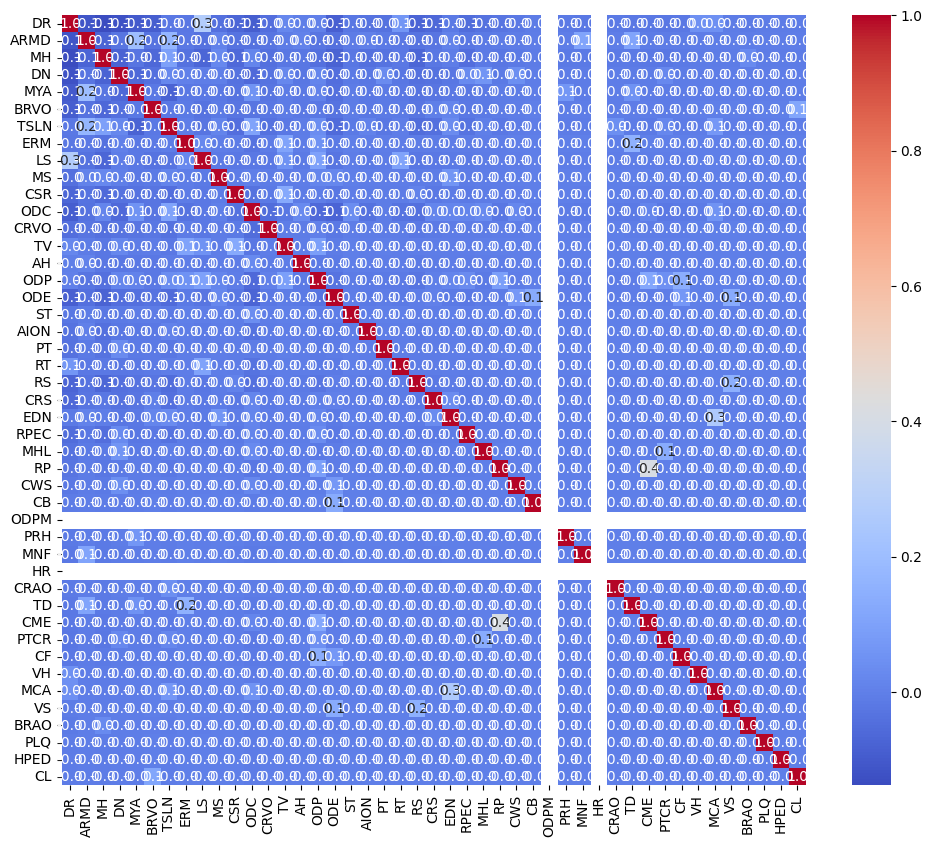

In [15]:
# Exclure les deux premières colonnes (ID et Disease_Risk) pour la matrice de corrélation
correlation_df = df_train.iloc[:, 2:].astype(float)

# Calculer la matrice de corrélation
correlation_matrix = correlation_df.corr()

# Créer une figure
plt.figure(figsize=(12, 10))

# Tracer la matrice de corrélation sous forme de carte de chaleur
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")

# Afficher le graphique
plt.show()

In [16]:
##### drop les colonnes qui ont que des 0 ##########
# Liste des noms de colonnes à supprimer
columns_to_drop = ['ODPM', 'HR']

# Supprimez les colonnes
df_train.drop(columns=columns_to_drop, inplace=True)

In [17]:
df_train_cleaned = df_test.copy()
df_train_cleaned['ID'] = df_train['ID'].astype(str) + '.png'
df_train_cleaned = df_train_cleaned.astype(str)

In [18]:
df_train_cleaned.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,PRH,HR,TD,CME,CF,VH,CL
0,1.png,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.png,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.png,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df_train_cleaned.to_csv(data_path + "/Training_Set/train_cleaned.csv", index=False)

## Cleaning the evaluation set 

In [20]:
# chercher les colonnes qui ont que des 0 dans df_evaluation
pd.set_option('display.max_columns', None)
for column in df_evaluation.columns[1:]:  # Commencez à partir de la deuxième colonne pour exclure 'ID'
    unique_values = df_evaluation[column].unique()
    print(f'Colonne {column}: {unique_values}')

Colonne Disease_Risk: [1 0]
Colonne DR: [1 0]
Colonne ARMD: [0 1]
Colonne MH: [0 1]
Colonne DN: [0 1]
Colonne MYA: [0 1]
Colonne BRVO: [0 1]
Colonne TSLN: [1 0]
Colonne ERM: [0 1]
Colonne LS: [0 1]
Colonne MS: [0 1]
Colonne CSR: [0 1]
Colonne ODC: [0 1]
Colonne CRVO: [0 1]
Colonne TV: [0 1]
Colonne AH: [0 1]
Colonne ODP: [0 1]
Colonne ODE: [0 1]
Colonne ST: [0 1]
Colonne AION: [0 1]
Colonne PT: [0 1]
Colonne RT: [0 1]
Colonne RS: [0 1]
Colonne CRS: [0 1]
Colonne EDN: [0 1]
Colonne RPEC: [0 1]
Colonne MHL: [0 1]
Colonne RP: [0 1]
Colonne CWS: [0 1]
Colonne CB: [0]
Colonne ODPM: [0 1]
Colonne PRH: [0 1]
Colonne MNF: [0]
Colonne HR: [0]
Colonne CRAO: [0 1]
Colonne TD: [0 1]
Colonne CME: [0 1]
Colonne PTCR: [0 1]
Colonne CF: [0 1]
Colonne VH: [0 1]
Colonne MCA: [0]
Colonne VS: [0 1]
Colonne BRAO: [0 1]
Colonne PLQ: [0 1]
Colonne HPED: [0]
Colonne CL: [0]


In [21]:
##### drop les colonnes qui ont que des 0 ##########
# Liste des noms de colonnes à supprimer
columns_to_drop = ['CB', 'HR', 'MCA', 'HPED', 'CL', 'MNF']

# Supprimez les colonnes
df_evaluation.drop(columns=columns_to_drop, inplace=True)

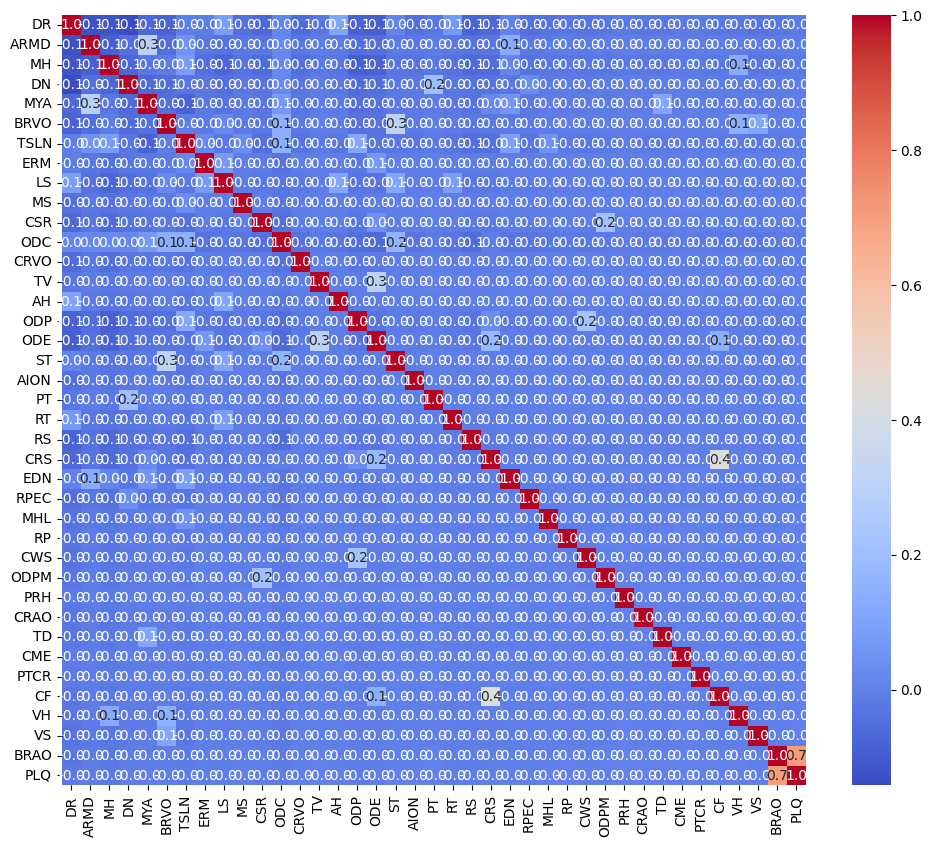

In [22]:
# Exclure les deux premières colonnes (ID et Disease_Risk) pour la matrice de corrélation
correlation_df = df_evaluation.iloc[:, 2:].astype(float)

# Calculer la matrice de corrélation
correlation_matrix = correlation_df.corr()

# Créer une figure
plt.figure(figsize=(12, 10))

# Tracer la matrice de corrélation sous forme de carte de chaleur
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")

# Afficher le graphique
plt.show()

In [23]:
## montrer les colonnes très corrélées
# Seuil de corrélation (par exemple, 0.6)
correlation_threshold = 0.6

# Trouver les paires de colonnes corrélées
correlated_pairs = {}
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        correlation_value = correlation_matrix.iloc[i, j]
        
        if abs(correlation_value) > correlation_threshold:
            correlated_pairs[(col1, col2)] = correlation_value

# Afficher les paires de colonnes corrélées
for pair, correlation_value in correlated_pairs.items():
    print(f"Corrélation entre {pair[0]} et {pair[1]} : {correlation_value:.2f}")

Corrélation entre BRAO et PLQ : 0.71


In [24]:
df_evaluation_cleaned = df_evaluation.copy()
df_evaluation_cleaned['ID'] = df_evaluation['ID'].astype(str) + '.png'
df_evaluation_cleaned = df_evaluation_cleaned.astype(str)

In [25]:
df_evaluation_cleaned.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,ODPM,PRH,CRAO,TD,CME,PTCR,CF,VH,VS,BRAO,PLQ
0,1.png,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.png,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.png,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.png,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.png,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
df_evaluation_cleaned.to_csv(data_path + "/Evaluation_Set/evaluation_cleaned.csv", index=False)

## Verify images quality 

In [27]:
### vérifier si les images ont la même résolution
# Chemin du dossier contenant les images
dossier_images_test = data_path + '/Test_Set/Test'

# Liste des fichiers d'images dans le dossier
fichiers_images = [fichier for fichier in os.listdir(dossier_images_test) if fichier.endswith(('.jpg', '.png', '.jpeg', '.gif'))]

# Créer un dictionnaire pour stocker les résolutions
resolutions = {}

# Parcourir les images et obtenir leurs résolutions
for fichier_image in fichiers_images:
    chemin_image = os.path.join(dossier_images_test, fichier_image)
    image = Image.open(chemin_image)
    largeur, hauteur = image.size
    resolutions[fichier_image] = (largeur, hauteur)
    image.close()

# Vérifier si toutes les résolutions sont identiques
premiere_resolution = list(resolutions.values())[0]
resolutions_identiques = all(res == premiere_resolution for res in resolutions.values())

if resolutions_identiques:
    print("Toutes les images ont la même résolution :", premiere_resolution)
else:
    print("Les images ont des résolutions différentes :")
    for fichier, resolution in resolutions.items():
        print(f"{fichier}: {resolution}")


Les images ont des résolutions différentes :
348.png: (2144, 1424)
412.png: (2144, 1424)
374.png: (2144, 1424)
360.png: (2144, 1424)
406.png: (2144, 1424)
638.png: (4288, 2848)
176.png: (2144, 1424)
88.png: (2144, 1424)
610.png: (4288, 2848)
604.png: (4288, 2848)
162.png: (2144, 1424)
189.png: (2144, 1424)
77.png: (2144, 1424)
63.png: (2144, 1424)
228.png: (2144, 1424)
566.png: (2048, 1536)
200.png: (2144, 1424)
214.png: (2144, 1424)
572.png: (2048, 1536)
599.png: (4288, 2848)
598.png: (4288, 2848)
215.png: (2144, 1424)
573.png: (2048, 1536)
567.png: (2048, 1536)
201.png: (2144, 1424)
229.png: (2144, 1424)
62.png: (2144, 1424)
188.png: (2144, 1424)
76.png: (2144, 1424)
605.png: (4288, 2848)
163.png: (2144, 1424)
177.png: (2144, 1424)
611.png: (4288, 2848)
89.png: (2144, 1424)
639.png: (4288, 2848)
361.png: (2144, 1424)
407.png: (2144, 1424)
413.png: (2144, 1424)
375.png: (2144, 1424)
349.png: (2144, 1424)
439.png: (2144, 1424)
405.png: (2144, 1424)
363.png: (2144, 1424)
377.png: (2144,

In [28]:
# Récupérer la liste des fichiers d'images
image_files = [f for f in os.listdir(dossier_images_test) if f.endswith((".jpg", ".jpeg", ".png"))]

# Créer un dictionnaire pour stocker les dimensions des images
image_dimensions = {}

# Parcourir les images et enregistrer leurs dimensions
for image_file in image_files:
    image_path = os.path.join(dossier_images_test, image_file)
    with Image.open(image_path) as img:
        width, height = img.size
        image_dimensions[image_file] = (width, height)

# Vérifier si toutes les images ont les mêmes dimensions
unique_dimensions = set(image_dimensions.values())

if len(unique_dimensions) == 1:
    print("Toutes les images ont les mêmes dimensions :", unique_dimensions.pop())
else:
    print("Les images ont des dimensions différentes :")
    for image_file, dimensions in image_dimensions.items():
        print(f"{image_file}: {dimensions}")

Les images ont des dimensions différentes :
348.png: (2144, 1424)
412.png: (2144, 1424)
374.png: (2144, 1424)
360.png: (2144, 1424)
406.png: (2144, 1424)
638.png: (4288, 2848)
176.png: (2144, 1424)
88.png: (2144, 1424)
610.png: (4288, 2848)
604.png: (4288, 2848)
162.png: (2144, 1424)
189.png: (2144, 1424)
77.png: (2144, 1424)
63.png: (2144, 1424)
228.png: (2144, 1424)
566.png: (2048, 1536)
200.png: (2144, 1424)
214.png: (2144, 1424)
572.png: (2048, 1536)
599.png: (4288, 2848)
598.png: (4288, 2848)
215.png: (2144, 1424)
573.png: (2048, 1536)
567.png: (2048, 1536)
201.png: (2144, 1424)
229.png: (2144, 1424)
62.png: (2144, 1424)
188.png: (2144, 1424)
76.png: (2144, 1424)
605.png: (4288, 2848)
163.png: (2144, 1424)
177.png: (2144, 1424)
611.png: (4288, 2848)
89.png: (2144, 1424)
639.png: (4288, 2848)
361.png: (2144, 1424)
407.png: (2144, 1424)
413.png: (2144, 1424)
375.png: (2144, 1424)
349.png: (2144, 1424)
439.png: (2144, 1424)
405.png: (2144, 1424)
363.png: (2144, 1424)
377.png: (2144, 

In [29]:
## donner la même résolution à toutes les images du folder test
# Dossier de destination pour les images redimensionnées
output_folder = data_path + "/Test_Set/Test_standardized"

# Vérifier si le dossier de destination existe, sinon le créer
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Résolution cible (72 ppi)
target_resolution = (72, 72)

# Parcourir toutes les images du dossier
for nom_fichier in os.listdir(dossier_images_test):
    chemin_image = os.path.join(dossier_images_test, nom_fichier)
    
    if os.path.isfile(chemin_image):
        # Ouvrez l'image
        image = Image.open(chemin_image)
        
        # Redimensionnez l'image
        image = image.resize(target_resolution)
        
        # Enregistrez l'image redimensionnée
        output_path = os.path.join(output_folder, nom_fichier)
        image.save(output_path)
        
        # Fermez l'image d'origine
        image.close()


In [30]:
## donner la même résolution à toutes les images du folder train
# Dossier de destination pour les images redimensionnées
output_folder = data_path + "/Train_Set/Train_standardized"

# Vérifier si le dossier de destination existe, sinon le créer
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Résolution cible (72 ppi)
target_resolution = (72, 72)

# Dossier contenant vos images
image_folder_train = data_path + "/Training_Set/Training"

# Parcourir toutes les images du dossier
for nom_fichier in os.listdir(image_folder_train):
    chemin_image = os.path.join(image_folder_train, nom_fichier)
    
    if os.path.isfile(chemin_image):
        # Ouvrez l'image
        image = Image.open(chemin_image)
        
        # Redimensionnez l'image
        image = image.resize(target_resolution)
        
        # Enregistrez l'image redimensionnée
        output_path = os.path.join(output_folder, nom_fichier)
        image.save(output_path)
        
        # Fermez l'image d'origine
        image.close()


In [31]:
## donner la même résolution à toutes les images du folder evaluation
# Dossier de destination pour les images redimensionnées
output_folder = data_path + "/Evaluation_Set/Validation_standardized"

# Vérifier si le dossier de destination existe, sinon le créer
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Résolution cible (72 ppi)
target_resolution = (72, 72)

# Dossier contenant vos images
image_folder_validation = data_path + "/Evaluation_Set/Validation"

# Parcourir toutes les images du dossier
for nom_fichier in os.listdir(image_folder_validation):
    chemin_image = os.path.join(image_folder_validation, nom_fichier)
    
    if os.path.isfile(chemin_image):
        # Ouvrez l'image
        image = Image.open(chemin_image)
        
        # Redimensionnez l'image
        image = image.resize(target_resolution)
        
        # Enregistrez l'image redimensionnée
        output_path = os.path.join(output_folder, nom_fichier)
        image.save(output_path)
        
        # Fermez l'image d'origine
        image.close()


## Linking images to dataframe

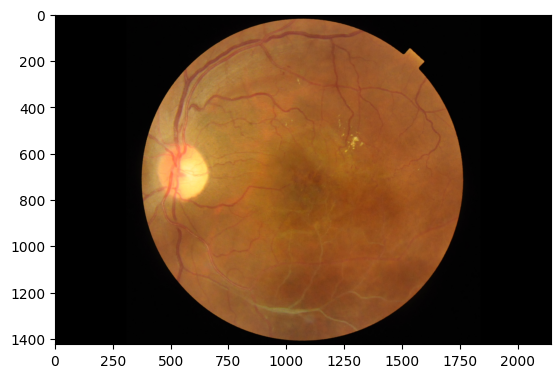

In [33]:
# Choose the image index you want to display
ID = 2  # Change the index as needed

image = Image.open(os.path.join(data_path + f'/Test_Set/Test/{ID}.png'))

# Display the chosen image
plt.imshow(image)
plt.show()

# Prétraitement des Images

In [35]:
# mettre toutes les images au même format (même si normalement c déjà le cas)
# Chemin vers le dossier contenant les images

# Liste pour stocker les images prétraitées
preprocessed_images = []

def preprocess_image(image_path, target_size=(224, 224)):
    # Charger l'image et redimensionner
    img = Image.open(image_path)
    img = img.resize(target_size)
    
    # Convertir en tableau NumPy et normaliser les pixels
    img_array = np.asarray(img) / 255.0
    
    return img_array

# Boucler sur les images et appliquer le prétraitement
for ID in df_test['ID']:
    image_path = os.path.join(data_path + f'/Test_Set/Test/{ID}.png')
    preprocessed_image = preprocess_image(image_path)
    preprocessed_images.append(preprocessed_image)

# Convertir en tableau NumPy pour une manipulation plus facile
preprocessed_images = np.array(preprocessed_images)

# Vérifier la forme du tableau d'images prétraitées
print("Forme du tableau d'images prétraitées:", preprocessed_images.shape)

Forme du tableau d'images prétraitées: (640, 224, 224, 3)
